# Criando os nomes

In [1]:
import pandas as pd

In [2]:
nomes_f = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=f")

In [3]:
nomes_m = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=m")

In [4]:
nomes_m

,nome,regiao,freq,rank,sexo
0,JOSE,0,5732508,1,M
1,JOAO,0,2971935,2,M
2,ANTONIO,0,2567494,3,M
3,FRANCISCO,0,1765197,4,M
4,CARLOS,0,1483121,5,M
...,...,...,...,...,...
195,WALTER,0,67207,196,M
196,ARLINDO,0,66669,197,M
197,MICHAEL,0,65736,198,M
198,ALVARO,0,65444,199,M


In [5]:
frames = [nomes_f, nomes_m]

In [6]:
nomes = pd.concat(frames, ignore_index=True)['nome'].to_frame()

In [7]:
nomes.sample(5)

,nome
68,LUIZA
80,TAIS
7,FERNANDA
191,TERESA
57,DAIANE


# Incluindo ID dos alunos

In [8]:
import numpy as np

In [9]:
np.random.seed(123)

In [10]:
total_alunos = len(nomes)
total_alunos

400

In [11]:
nomes['id_aluno'] = np.random.permutation(total_alunos) + 1

In [12]:
nomes.sample(10)

,nome,id_aluno
188,POLIANA,369
57,DAIANE,303
203,FRANCISCO,382
382,CHARLES,33
230,ANDERSON,111
284,SEVERINO,78
104,EVA,13
236,ROBERTO,364
4,ADRIANA,343
267,HENRIQUE,64


In [13]:
dominios = ['@dominioemail.com.br', '@servicodoemail.com']
nomes['dominio'] = np.random.choice(dominios, total_alunos)
nomes.sample(5)

,nome,id_aluno,dominio
284,SEVERINO,78,@dominioemail.com.br
200,JOSE,331,@servicodoemail.com
379,IAGO,340,@dominioemail.com.br
10,SANDRA,174,@dominioemail.com.br
171,TERESINHA,45,@dominioemail.com.br


In [14]:
nomes['email_aluno'] = nomes.nome.str.lower() + nomes.dominio 

In [15]:
nomes.sample(5)

,nome,id_aluno,dominio,email_aluno
314,ARTHUR,320,@dominioemail.com.br,arthur@dominioemail.com.br
57,DAIANE,303,@servicodoemail.com,daiane@servicodoemail.com
85,HELENA,221,@dominioemail.com.br,helena@dominioemail.com.br
183,IRACI,8,@dominioemail.com.br,iraci@dominioemail.com.br
189,DALVA,137,@dominioemail.com.br,dalva@dominioemail.com.br


# Criando a tabela cursos

In [16]:
import html5lib
url = 'http://tabela-cursos.herokuapp.com/index.html'
cursos = pd.read_html(url)
cursos

[                          Nome do curso
 0                 Lógica de programação
 1                         Java para Web
 2                           C# para Web
 3                         Ruby on Rails
 4                      Cursos de Python
 5                         PHP com MySql
 6                         .NET para web
 7            Novas integrações com Java
 8                          TDD com Java
 9                   Código limpo com C#
 10  Preparatório para certificação Java
 11                      Hardware básico
 12                Persistência com .NET
 13                  Desenvolvendo jogos
 14                     Análise de dados
 15                   Estatística básica
 16                  Internet das coisas
 17                Programação funcional
 18                Boas práticas em Java
 19          Orientação objetos com Java]

In [17]:
type(cursos)

list

In [18]:
cursos = cursos[0]

In [19]:
cursos

,Nome do curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python
5,PHP com MySql
6,.NET para web
7,Novas integrações com Java
8,TDD com Java
9,Código limpo com C#


In [20]:
type(cursos)

pandas.core.frame.DataFrame

In [21]:
#nomes['curso'] = np.random.choice(cursos['Nome do curso'], total_alunos)

In [22]:
cursos = cursos.rename(columns={'Nome do curso': 'nome_do_curso'})

In [23]:
nomes.sample(5)

,nome,id_aluno,dominio,email_aluno
59,ISABEL,83,@dominioemail.com.br,isabel@dominioemail.com.br
172,REBECA,165,@servicodoemail.com,rebeca@servicodoemail.com
330,JUNIOR,184,@dominioemail.com.br,junior@dominioemail.com.br
270,JOAQUIM,248,@servicodoemail.com,joaquim@servicodoemail.com
371,VALDEMIR,3,@dominioemail.com.br,valdemir@dominioemail.com.br


# Matriculando os alunos nos cursos

In [24]:
nomes['matriculas'] = np.ceil(np.random.exponential(size = total_alunos)* 1.5).astype(int)

In [25]:
nomes.sample(3)

,nome,id_aluno,dominio,email_aluno,matriculas
333,RUAN,130,@servicodoemail.com,ruan@servicodoemail.com,1
44,RAIMUNDA,259,@servicodoemail.com,raimunda@servicodoemail.com,1
50,RAFAELA,27,@dominioemail.com.br,rafaela@dominioemail.com.br,1


In [26]:
nomes.matriculas.describe()

count    400.000000
mean       2.147500
std        1.619352
min        1.000000
25%        1.000000
50%        1.500000
75%        3.000000
max       10.000000
Name: matriculas, dtype: float64

In [27]:
import seaborn as sns

c:\robotframework_python3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='matriculas', ylabel='Density'>

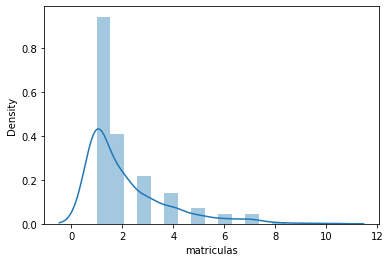

In [28]:
sns.distplot(nomes.matriculas)

In [29]:
nomes.matriculas.value_counts()

1     200
2      87
3      46
4      30
5      15
6       9
7       9
8       2
9       1
10      1
Name: matriculas, dtype: int64

# Selecionando cursos

In [30]:
nomes.sample(5)

,nome,id_aluno,dominio,email_aluno,matriculas
97,BARBARA,201,@servicodoemail.com,barbara@servicodoemail.com,1
370,ALEXANDRO,341,@servicodoemail.com,alexandro@servicodoemail.com,1
397,MICHAEL,323,@dominioemail.com.br,michael@dominioemail.com.br,2
396,ARLINDO,99,@servicodoemail.com,arlindo@servicodoemail.com,1
138,NEUSA,75,@dominioemail.com.br,neusa@dominioemail.com.br,2


In [31]:
todas_matriculas = []
x = np.random.rand(20)
prob = x / sum (x)

In [32]:
for index, row in nomes.iterrows():
    id = row.id_aluno
    matriculas = row.matriculas
    for i in range(matriculas):
        mat = [id, np.random.choice(cursos.index, p = prob)]
        todas_matriculas.append(mat)
    
matriculas = pd.DataFrame(todas_matriculas, columns = ['id_aluno', 'id_curso'])

In [33]:
matriculas.head()

,id_aluno,id_curso
0,235,5
1,235,15
2,43,5
3,43,10
4,43,11


In [34]:
matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns={'id_aluno':'quantidade_de_alunos'})

,quantidade_de_alunos,nome_do_curso
id_curso,,
0,59,Lógica de programação
1,31,Java para Web
2,53,C# para Web
3,4,Ruby on Rails
4,12,Cursos de Python
5,75,PHP com MySql
6,32,.NET para web
7,18,Novas integrações com Java
8,59,TDD com Java


# Saidas em diferentes formatos

In [37]:
matriculas.to_csv('matriculas_por_curso.csv', index = 'false')